In [1]:
import matplotlib.pyplot as plt
import noise_yum as n

import numpy as np

In [2]:
# force matplotlib to plot inline
%matplotlib inline

# plot parameters
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
# plt.rcParams["figure.dpi"] = 300
# plt.rcParams["text.usetex"] = False
# plt.rcParams["figure.figsize"] = (5, 3)  # good default size for column-width figure
plt.rcParams["figure.figsize"] = (9, 4)

c = []

In [3]:
# Settings
ETA = 0.43  # detector responsivity [A/W]

GAIN_SIG = 1e4  # detector gain of signal
GAIN_LINOUT = 1e5  # detector gain of linear output

In [4]:
# generalize to not always require loading/processing signal and detector
signals, detector, folder_name = n.load_files()

Select signal files
Each signal file contains 100004 timesteps
Select detector files
Each detector file contains 100004 timesteps


In [5]:
channels = [1, 2, 3]
channel_names = {1: 'SigDC', 2: 'SigAC', 3: 'LinOut'}
f_sig, avg_psd_sig, f_det, avg_psd_det = n.compute_psds(signals, detector, channels)

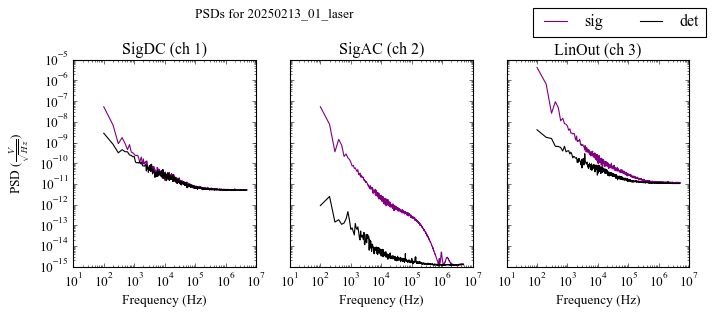

In [6]:
# plot each channel (signal and detector)
fig, ax = plt.subplots(1, len(channels), sharey=True)

for i, channel in enumerate(channels):
    ax[i].loglog(f_sig[i], avg_psd_sig[i], 'purple', label="Signal")
    ax[i].loglog(f_det[i], avg_psd_det[i], 'black', label="Detector")
    ax[i].loglog()
    ax[i].set_title(f'{channel_names[channel]} (ch {channel})')
    ax[i].set_xlabel("Frequency (Hz)")
    
fig.suptitle(f"PSDs for {folder_name}", ha='right')

ax[0].set_ylabel(r'PSD ($\frac{V}{\sqrt{Hz}}$)')
fig.legend(['sig', 'det'], loc='upper right', ncol=2)
plt.tight_layout()

In [7]:
# Calculate mean power
sig_dc = np.array([signal[1] for signal in signals])  # 2d array sig_dc[acquisition][timestamp]

# compute mean statistical values
mean_dc = np.mean(np.mean(sig_dc, axis=1))
std_dc = np.mean(np.std(sig_dc, axis=1))
rms_dc = np.mean(np.sqrt(np.mean(sig_dc ** 2, axis=0)))

print(f"Mean DC signal {mean_dc:.2f} V")
print(f"Standard deviation of DC signal {std_dc:.2f} V")
print(f"RMS of DC signal {rms_dc:.2f} V")

pwr_dc = mean_dc / (ETA * GAIN_SIG)  # V to W
print(f"Average power of DC signal {pwr_dc:.4f} W")

Mean DC signal 8.49 V
Standard deviation of DC signal 0.01 V
RMS of DC signal 8.49 V
Average power of DC signal 0.0020 W


In [8]:
# Calculate mean power
sig_dc = np.array([signal[1] for signal in signals])
mean_dc, power_dc = n.compute_mean_power(sig_dc, ETA, GAIN_SIG)
mean_linout = mean_dc * GAIN_LINOUT / GAIN_SIG

Mean 8.49 V
Standard deviation 0.01 V
RMS 8.49 V
Average power 0.0020 W


In [9]:
# Calculate RIN = (signal - detector) / (V^2)
rin_ac = n.compute_rin(avg_psd_sig[0], mean_dc, avg_psd_det[0])
rin_linout = n.compute_rin(avg_psd_sig[2], mean_linout, avg_psd_det[2])

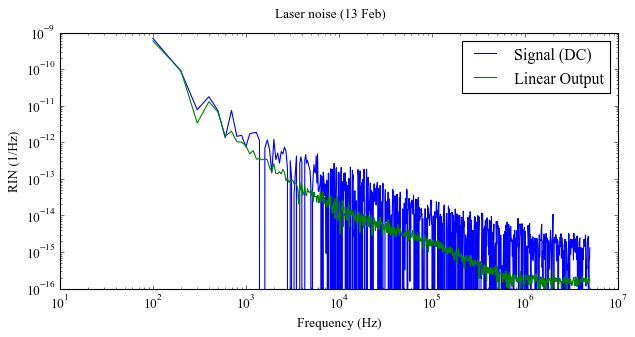

In [ ]:
fig, ax = plt.subplots()
ax.loglog(f_sig[0], rin_ac, label='Signal (AC)')
ax.loglog(f_sig[0], rin_linout, label='Linear Output')

fig.suptitle('Laser noise (13 Feb)')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('RIN (1/Hz)')
ax.set_xlim(0, 1e7)
ax.set_ylim(1e-16, 1e-9)
ax.legend()